## Car Price Prediction
##  Vidul Garg

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [72]:
df=pd.read_csv(r"D:\MachineLearning\OasisInternship\Task 3 (Car Price Prediction)\CarPrice.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Visualization

In [74]:
# Max, Min and Avg value of price:
print("Maximum Value of Price: $",df["price"].max())
print("Average Value of Price: $ %.2f" % df["price"].mean())
print("Minimum Value of Price: $",df["price"].min())

Maximum Value of Price: $ 45400.0
Average Value of Price: $ 13276.71
Minimum Value of Price: $ 5118.0


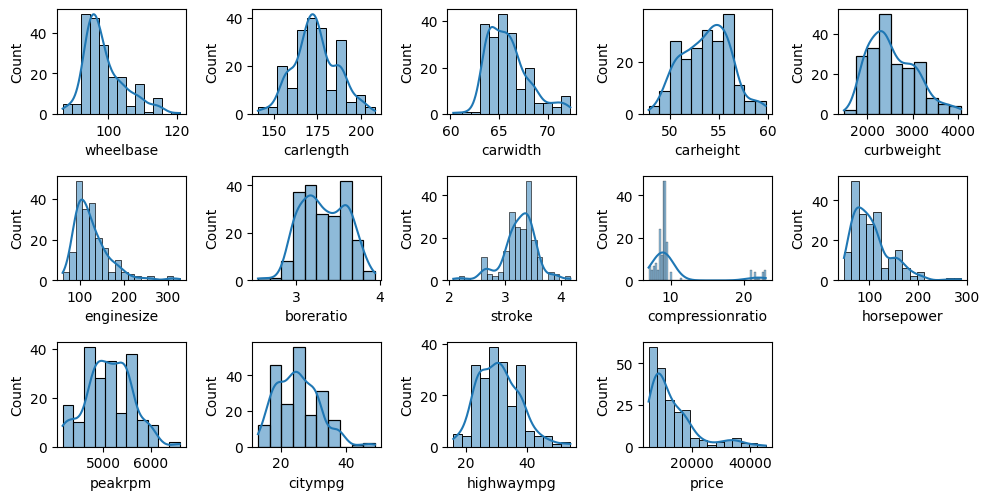

In [75]:
# Hist plots for numerical columns
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']
plt.figure(figsize=(10,8))  # Adjust the figure size as needed
for i in numerical_features:
    plt.subplot(5, 5, numerical_features.index(i) + 1)
    sns.histplot(df[i],kde=True)
plt.tight_layout()

<Axes: >

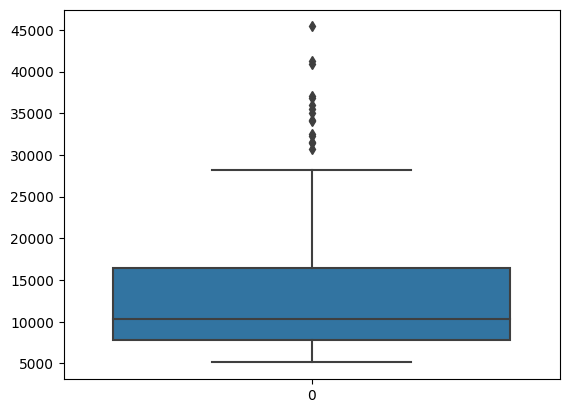

In [76]:
sns.boxplot(df["price"])

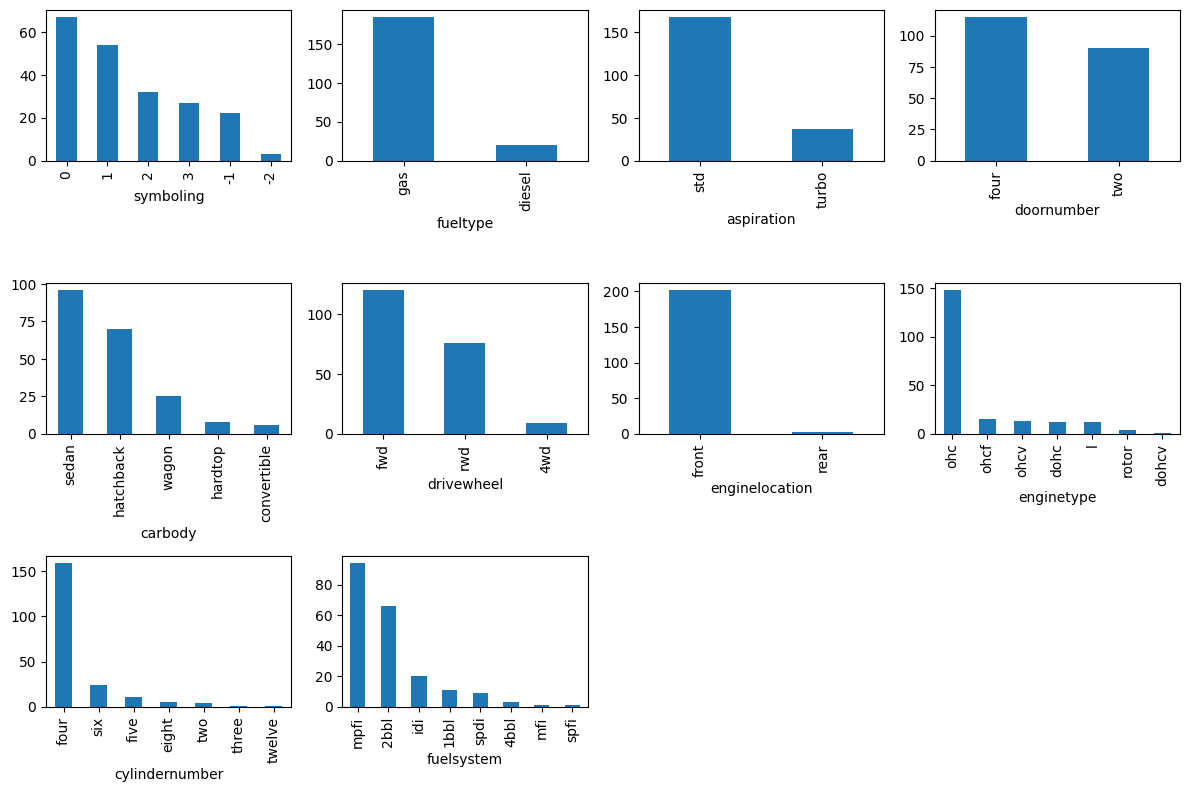

In [77]:
# Count Plots for categorical columns
categorical_columns=["symboling","fueltype","aspiration","doornumber","carbody","drivewheel",
                     "enginelocation","enginetype","cylindernumber","fuelsystem"]
plt.figure(figsize=(12,10))  # Adjust the figure size as needed
for i in categorical_columns:
    plt.subplot(4, 4, categorical_columns.index(i) + 1)
    df[i].value_counts().plot(kind='bar')
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'toyota corona'),
  Text(1, 0, 'peugeot 504'),
  Text(2, 0, 'toyota corolla'),
  Text(3, 0, 'subaru dl'),
  Text(4, 0, 'mitsubishi mirage g4'),
  Text(5, 0, 'mazda 626'),
  Text(6, 0, 'toyota mark ii'),
  Text(7, 0, 'mitsubishi outlander'),
  Text(8, 0, 'mitsubishi g4'),
  Text(9, 0, 'honda civic'),
  Text(10, 0, 'mazda rx-7 gs'),
  Text(11, 0, 'mazda rx-4'),
  Text(12, 0, 'mazda glc deluxe'),
  Text(13, 0, 'nissan rogue'),
  Text(14, 0, 'nissan latio')])

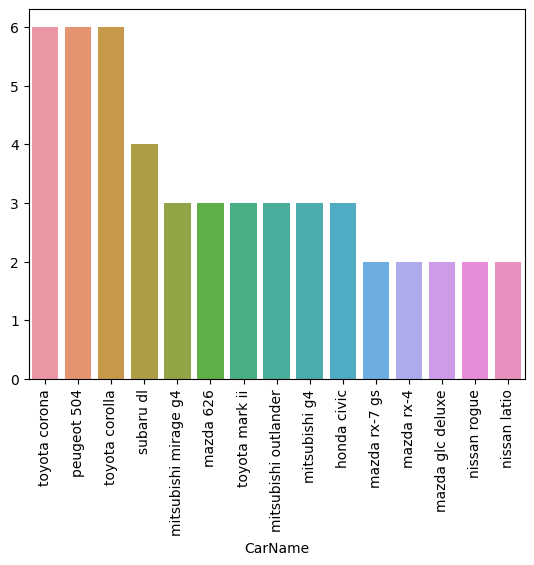

In [78]:
#Top 15 car models which are sold
item_counts = df['CarName'].value_counts().sort_values(ascending=False).iloc[0:15]
sns.barplot(x=item_counts.index, y=item_counts.values)
plt.xticks(rotation=90)

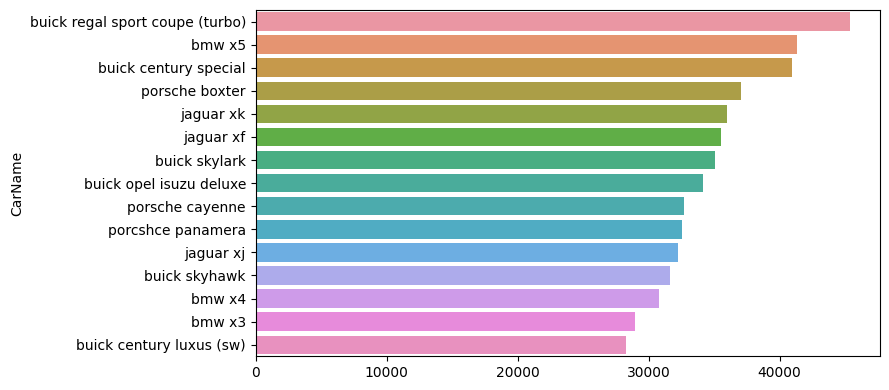

In [79]:
# Top 15 Car models according to price
plt.figure(figsize=(9, 4))
prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False).iloc[0:15]
sns.barplot(x=prices_by_car.values,y=prices_by_car.index)
plt.tight_layout()

## Encoding (--Categorical columns)

In [80]:
for i in categorical_columns:
    print(df[i].value_counts())
    print("\n")

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64


fueltype
gas       185
diesel     20
Name: count, dtype: int64


aspiration
std      168
turbo     37
Name: count, dtype: int64


doornumber
four    115
two      90
Name: count, dtype: int64


carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


enginelocation
front    202
rear       3
Name: count, dtype: int64


enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64




In [81]:
# Label Encoding
list=["CarName","fueltype","aspiration","doornumber","carbody","drivewheel",
                     "enginelocation","enginetype","cylindernumber","fuelsystem"]
le=LabelEncoder()
for i in list:
    df[i]=le.fit_transform(df[i])
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


## Correlation using heatmap

<Axes: >

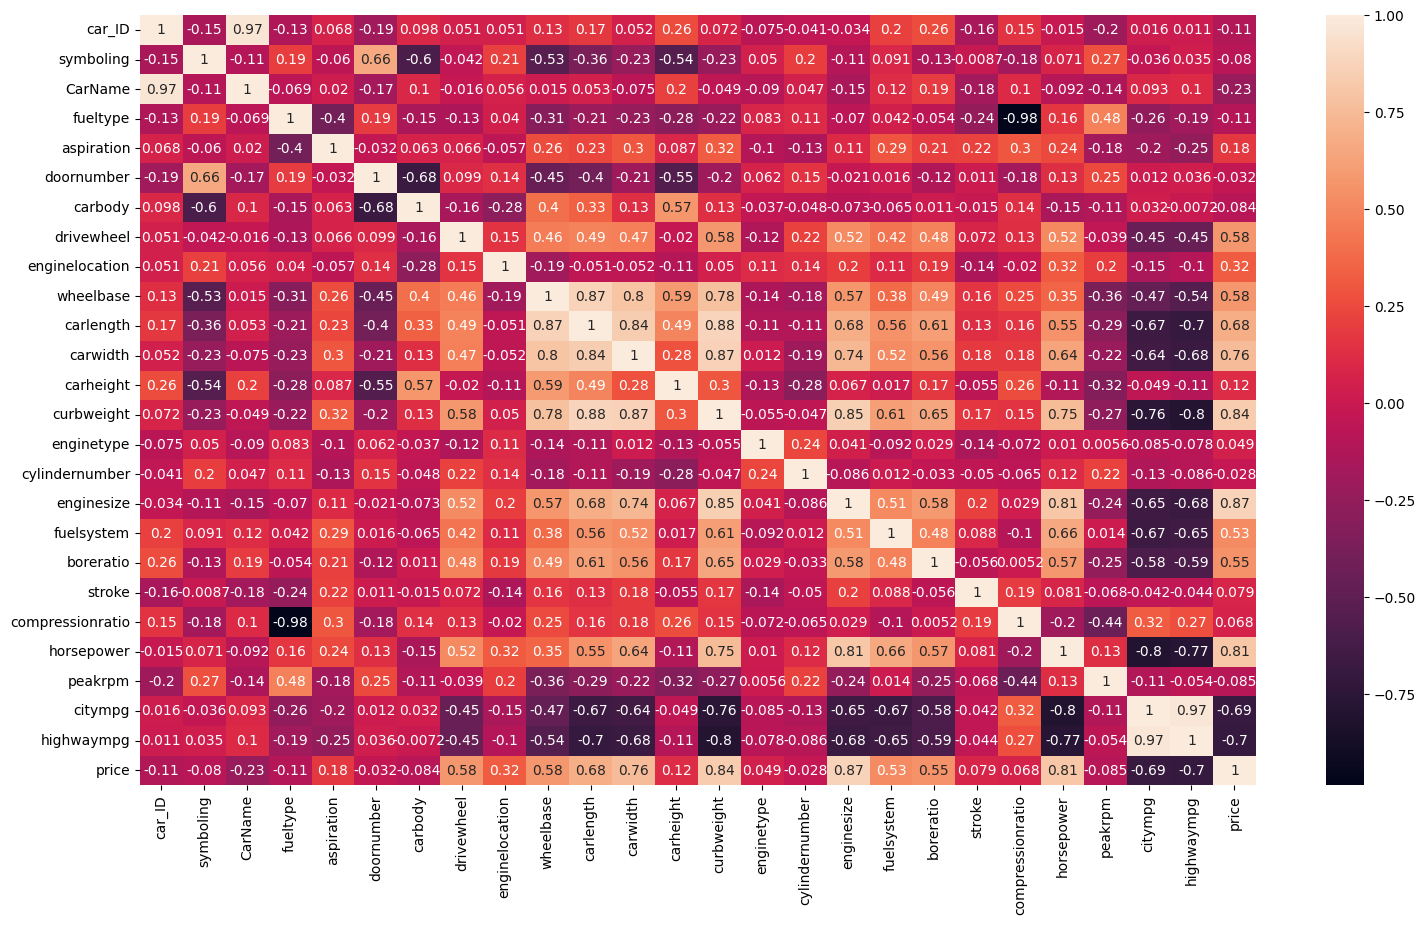

In [82]:
plt.figure(figsize=(18, 10))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [83]:
# Cecking correlated features
def correlation (dataset,threshold):
    col_corr=set() # --> it will contain all names of corr columns
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                col_corr.add(corr_matrix.columns[i])
                print(df.columns[i],"----",df.columns[j],"----->",corr_matrix.iloc[i,j])  
    return col_corr

In [84]:
print(correlation(df,0.85))    # Generally choosing 0.85 (85%)
# We can remove these features !!! (except price obviously)

CarName ---- car_ID -----> 0.9670768772317996
carlength ---- wheelbase -----> 0.874587475964264
curbweight ---- carlength -----> 0.8777284608306433
curbweight ---- carwidth -----> 0.8670324646791233
enginesize ---- curbweight -----> 0.850594073426277
highwaympg ---- citympg -----> 0.9713370423425045
price ---- enginesize -----> 0.8741448025245117
{'highwaympg', 'enginesize', 'curbweight', 'price', 'CarName', 'carlength'}


In [85]:
df.drop(['car_ID','carlength','curbweight', 'highwaympg'],axis=1,inplace=True)
#Remove features according to you whoch are relevant and also by correlation 

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int32  
 2   fueltype          205 non-null    int32  
 3   aspiration        205 non-null    int32  
 4   doornumber        205 non-null    int32  
 5   carbody           205 non-null    int32  
 6   drivewheel        205 non-null    int32  
 7   enginelocation    205 non-null    int32  
 8   wheelbase         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  enginetype        205 non-null    int32  
 12  cylindernumber    205 non-null    int32  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    int32  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

## Splitting into dependent and independent variables

In [87]:
x=df.iloc[:,:20]
y=df.iloc[:,-1]
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int32  
 2   fueltype          205 non-null    int32  
 3   aspiration        205 non-null    int32  
 4   doornumber        205 non-null    int32  
 5   carbody           205 non-null    int32  
 6   drivewheel        205 non-null    int32  
 7   enginelocation    205 non-null    int32  
 8   wheelbase         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  enginetype        205 non-null    int32  
 12  cylindernumber    205 non-null    int32  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    int32  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

## Feature Scaling

In [88]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    float64
 1   1       205 non-null    float64
 2   2       205 non-null    float64
 3   3       205 non-null    float64
 4   4       205 non-null    float64
 5   5       205 non-null    float64
 6   6       205 non-null    float64
 7   7       205 non-null    float64
 8   8       205 non-null    float64
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    float64
 14  14      205 non-null    float64
 15  15      205 non-null    float64
 16  16      205 non-null    float64
 17  17      205 non-null    float64
 18  18      205 non-null    float64
 19  19      205 non-null    float64
dtypes: float64(20)
memory usage: 32.2 KB


## Train_Test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

## Linear Regression

In [90]:
model1=LinearRegression()
model1

LinearRegression()

In [91]:
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [92]:
def scores(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("Mean_Squared_error: ", mse)
    print("Root_Mean_Squared_error: ", rmse)
    print("R2 Score (Accuracy): {:.2f}%".format(r2 * 100))

# MSE/RMSE: Lower values are better.
# R2 Score: Higher values are better.

In [93]:
scores(y_test,y_pred1)

Mean_Squared_error:  6240364.109806056
Root_Mean_Squared_error:  2498.072078585015
R2 Score (Accuracy): 80.93%


## Decision Tree

In [94]:
model2=DecisionTreeRegressor()
model2

DecisionTreeRegressor()

In [95]:
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [96]:
scores(y_test,y_pred2)

Mean_Squared_error:  4170327.7073170734
Root_Mean_Squared_error:  2042.1380235716374
R2 Score (Accuracy): 87.26%


## Random Forest

In [97]:
model3=RandomForestRegressor()
model3

RandomForestRegressor()

In [98]:
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [99]:
scores(y_test,y_pred3)

Mean_Squared_error:  2373657.214093224
Root_Mean_Squared_error:  1540.667781870324
R2 Score (Accuracy): 92.75%


## We can see that Random Forest Regressor gives more accuracy and less error than other models !!

In [100]:
## Try prediction :

In [101]:
# Enter 
 # 0   symboling
 # 1   CarName 
 # 2   fueltype
 # 3   aspiration
 # 4   doornumber  
 # 5   carbody 
 # 6   drivewheel 
 # 7   enginelocation 
 # 8   wheelbase 
 # 9   carwidth 
 # 10  carheight
 # 11  enginetype
 # 12  cylindernumber
 # 13  enginesize
 # 14  fuelsystem
 # 15  boreratio
 # 16  stroke
 # 17  compressionratio
 # 18  horsepower
 # 19  peakrpm  

## Predicting 

In [102]:
features = [0.6, 0.006849, 1.0, 0.0, 1.0, 0.50, 1.0, 0.0, 0.230321, 0.433333, 0.383333, 0.833333, 0.500000, 0.343396, 0.714286, 0.100000, 0.666667, 0.1250,	0.441667, 0.346939]
car_price = model3.predict([features])
print("Predicted Price: $ {:.2f}".format(car_price[0]))

Predicted Price: $ 14182.98
